In [1]:
%load_ext autoreload
%autoreload 2

import scipy.special as sps
import numpy as np

import matplotlib.pyplot as plt
import daft

import sys
sys.path.append("../../neuroprob/")

from neuroprob import utils

import models

import pickle


#from matplotlib import rc
#rc("font", family="serif", size=12)
#rc("text", usetex=True)
plt.style.use(['paper.mplstyle'])

In [2]:
datarun = pickle.load(open('./checkpoint/P_CA1D_rg.p', 'rb'))


grid_size_pos, grid_shape_pos, field_pos, ff_pos, \
    grid_size_xt, grid_shape_xt, field_xt, ff_xt, \
    grid_size_xth, grid_shape_xth, field_xth, ff_xth, \
    lower_theta, mean_theta, upper_theta, fflower_theta, ffmean_theta, ffupper_theta, covariates_theta, \
    lower_hd, mean_hd, upper_hd, fflower_hd, ffmean_hd, ffupper_hd, covariates_hd, \
    lower_s, mean_s, upper_s, fflower_s, ffmean_s, ffupper_s, covariates_s, \
    show_neuron, max_count, tbin, rcov = datarun

In [7]:
show_neuron = [2, 3, # PoS
              8, 11] # ANT

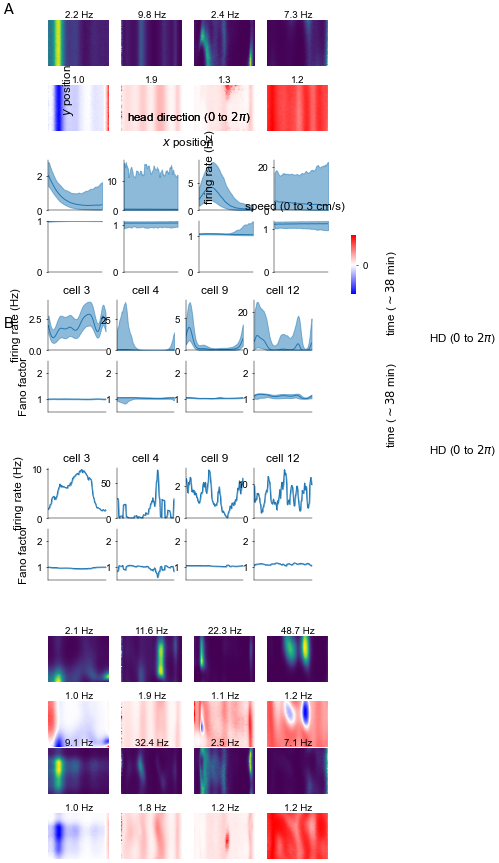

In [8]:
fig = plt.figure(figsize=(8, 4))
fig.text(-0.08, 1.02, 'A', transform=fig.transFigure, size=15)
fig.text(-0.08, -0.1, 'B', transform=fig.transFigure, size=15)


white = '#ffffff'
black = '#000000'
red = '#ff0000'
blue = '#0000ff'
weight_map = utils.plot.make_cmap([blue, white, red], 'weight_map')





# position tuning
X = 0.0
Y = 0.0
widths = [1, 1, 1, 1]
heights = [1, 1]
spec = fig.add_gridspec(ncols=len(widths), nrows=len(heights), width_ratios=widths,
                        height_ratios=heights, hspace=0.4, 
                        left=.0+X, right=0.5+X, bottom=0.6+Y, top=Y+1.)

for m, neuron in enumerate(show_neuron):
    ax = fig.add_subplot(spec[0, m])
    m = neuron
    rate = field_pos[0][m]/tbin
    ax.set_title('{:.1f} Hz'.format(rate.max()), fontsize=10, pad=-5)
    im = utils.plot.visualize_field((fig, ax), rate.T, grid_shape_pos, cbar=False, aspect='auto')
    utils.plot.decorate_ax(ax, spines=[False, False, False, False])
    
for m, neuron in enumerate(show_neuron):
    ax = fig.add_subplot(spec[1, m])
    m = neuron
    FF = ff_pos[0][m]
    rate = np.log(FF)
    g = max(-rate.min(), rate.max())
    ax.set_title('{:.1f}'.format(FF.max()), fontsize=10, pad=-5)
    im = utils.plot.visualize_field((fig, ax), rate.T, grid_shape_pos, cbar=False, aspect='auto', 
                                    vmin=-g, vmax=g, cmap=weight_map)
    utils.plot.decorate_ax(ax, spines=[False, False, False, False])
    
fig.text(0.02+X, Y+0.75, r'$y$ position', rotation=90, fontsize=12, va='center')
fig.text(0.25+X, Y+0.55, r'$x$ position', fontsize=12, ha='center')

widths = [1]
heights = [1]
spec = fig.add_gridspec(ncols=len(widths), nrows=len(heights), width_ratios=widths,
                        height_ratios=heights,
                        left=0.54+X, right=0.55+X, bottom=0.02+Y, top=0.23+Y)
ax = fig.add_subplot(spec[0, 0])
utils.plot.add_colorbar((fig, ax), im, ticktitle='', ticks=[0, field_pos[len(show_neuron)-1].max()], ticklabels=['0', 'max'], 
                        cbar_format=None)




# speed modulation
X = 0.0
Y = 0.0
widths = [1, 1, 1, 1]
heights = [1, 1]
spec = fig.add_gridspec(ncols=len(widths), nrows=len(heights), width_ratios=widths,
                        height_ratios=heights, wspace=0.4, 
                        left=.0+X, right=.5+X, bottom=0.1+Y, top=0.5+Y)


for m, neuron in enumerate(show_neuron):
    ax = fig.add_subplot(spec[0, m])
    m = neuron
    line, = ax.plot(covariates_s, mean_s[m]/tbin)
    ax.fill_between(
        covariates_s, lower_s[m]/tbin,
        upper_s[m]/tbin, color=line.get_color(), alpha=0.5
    )
    ax.set_ylim(0)
    ax.set_xlim(covariates_s[0], covariates_s[-1])
    ax.set_xticks([])
    
    
for m, neuron in enumerate(show_neuron):
    ax = fig.add_subplot(spec[1, m])
    m = neuron
    line, = ax.plot(covariates_s, ffmean_s[m])
    ax.fill_between(
        covariates_s, fflower_s[m],
        ffupper_s[m], color=line.get_color(), alpha=0.5
    )
    ax.set_ylim(0)
    ax.set_xlim(covariates_s[0], covariates_s[-1])
    ax.set_xticks([])
    
fig.text(0.28+X, Y+0.475, 'firing rate (Hz)', rotation=90, fontsize=12, va='center')
fig.text(0.44+X, Y+0.32, r'speed (0 to 3 cm/s)', fontsize=12, ha='center')




# HD
X = 0.0
Y = 0.0
widths = [1, 1, 1, 1]
heights = [1, 1]
spec = fig.add_gridspec(ncols=len(widths), nrows=len(heights), width_ratios=widths, 
                        height_ratios=heights, wspace=0.2, hspace=0.2, 
                        left=0.0+X, right=0.47+X, bottom=-0.4+Y, top=0.0+Y)

for k, ne in enumerate(show_neuron):
    ax = fig.add_subplot(spec[0, k])
    if k == 0:
        ax.set_ylabel('firing rate (Hz)')
        
    k = ne
    ax.set_title('cell {}'.format(ne+1), fontsize=12)
    line, = ax.plot(covariates_hd, mean_hd[k]/tbin)
    ax.fill_between(
        covariates_hd, lower_hd[k]/tbin,
        upper_hd[k]/tbin, color=line.get_color(), alpha=0.5
    )
    
    #ax.scatter(bhd_t, brate[k], s=1, color='grey', alpha=0.3)
    ax.set_ylim(0)
    ax.set_xlim(0, 2*np.pi)
    ax.set_xticks([])
#fig.text(0.25+X, 0.64+Y, r'head direction ($0$ to $2\pi$)', fontsize=12, ha='center')


for k, ne in enumerate(show_neuron):
    ax = fig.add_subplot(spec[1, k])
    if k == 0:
        ax.set_ylabel('Fano factor')
        
    k = ne
    #ax.set_title('cell {}'.format(ne+1), fontsize=12)
    line, = ax.plot(covariates_hd, ffmean_hd[k])
    ax.fill_between(
        covariates_hd, fflower_hd[k],
        ffupper_hd[k], color=line.get_color(), alpha=0.5
    )
    
    ax.set_ylim(0.5, 2.5)
    ax.set_xlim(0, 2*np.pi)
    ax.set_xticks([])
fig.text(0.25+X, 0.64+Y, r'head direction ($0$ to $2\pi$)', fontsize=12, ha='center')




# theta
X = 0.0
Y = 0.0
widths = [1, 1, 1, 1]
heights = [1, 1]
spec = fig.add_gridspec(ncols=len(widths), nrows=len(heights), width_ratios=widths, 
                        height_ratios=heights, wspace=0.2, hspace=0.2, 
                        left=0.0+X, right=0.47+X, bottom=-1.0+Y, top=-0.6+Y)

for k, ne in enumerate(show_neuron):
    ax = fig.add_subplot(spec[0, k])
    if k == 0:
        ax.set_ylabel('firing rate (Hz)')
        
    k = ne
    ax.set_title('cell {}'.format(ne+1), fontsize=12)
    line, = ax.plot(covariates_theta, mean_theta[k]/tbin)
    ax.fill_between(
        covariates_theta, lower_theta[k]/tbin,
        upper_theta[k]/tbin, color=line.get_color(), alpha=0.5
    )
    
    #ax.scatter(bhd_t, brate[k], s=1, color='grey', alpha=0.3)
    ax.set_ylim(0)
    ax.set_xlim(0, 2*np.pi)
    ax.set_xticks([])
#fig.text(0.25+X, 0.64+Y, r'head direction ($0$ to $2\pi$)', fontsize=12, ha='center')


for k, ne in enumerate(show_neuron):
    ax = fig.add_subplot(spec[1, k])
    if k == 0:
        ax.set_ylabel('Fano factor')
        
    k = ne
    #ax.set_title('cell {}'.format(ne+1), fontsize=12)
    line, = ax.plot(covariates_theta, ffmean_theta[k])
    ax.fill_between(
        covariates_theta, fflower_theta[k],
        ffupper_theta[k], color=line.get_color(), alpha=0.5
    )
    
    ax.set_ylim(0.5, 2.5)
    ax.set_xlim(0, 2*np.pi)
    ax.set_xticks([])
fig.text(0.25+X, 0.64+Y, r'head direction ($0$ to $2\pi$)', fontsize=12, ha='center')








# population drift
X = 0.0
Y = -0.1
widths = [1, 1, 1, 1]
heights = [1, 1]
spec = fig.add_gridspec(ncols=len(widths), nrows=len(heights), width_ratios=widths,
                        height_ratios=heights, hspace=0.4, 
                        left=.0+X, right=.5+X, bottom=-1.5+Y, top=-1.1+Y)

for m, neuron in enumerate(show_neuron):
    ax = fig.add_subplot(spec[0, m])
    m = neuron
    rate = field_xt[m]/tbin
    ax.set_title('{:.1f} Hz'.format(rate.max()), fontsize=10, pad=-5)
    im = utils.plot.visualize_field((fig, ax), rate.T, grid_shape_xt, cbar=False, aspect='auto')
    utils.plot.decorate_ax(ax, spines=[False, False, False, False])
    
for m, neuron in enumerate(show_neuron):
    ax = fig.add_subplot(spec[1, m])
    m = neuron
    FF = ff_xt[m]
    rate = np.log(FF)
    g = max(-rate.min(), rate.max())
    ax.set_title('{:.1f} Hz'.format(FF.max()), fontsize=10, pad=-5)
    im = utils.plot.visualize_field((fig, ax), rate.T, grid_shape_xt, cbar=False, aspect='auto', 
                                    vmin=-g, vmax=g, cmap=weight_map)
    utils.plot.decorate_ax(ax, spines=[False, False, False, False])
    
fig.text(.6+X, 0.125+Y, r'time ($\sim 38$ min)', rotation=90, fontsize=12, va='center')
fig.text(.74+X, -0.05+Y, 'HD ($0$ to $2\pi$)', fontsize=12, ha='center')




### x theta ###
X = 0.0
Y = -0.5
widths = [1, 1, 1, 1]
heights = [1, 1]
spec = fig.add_gridspec(ncols=len(widths), nrows=len(heights), width_ratios=widths,
                        height_ratios=heights, hspace=0.4, 
                        left=.0+X, right=.5+X, bottom=-1.5+Y, top=-1.1+Y)

for m, neuron in enumerate(show_neuron):
    ax = fig.add_subplot(spec[0, m])
    m = neuron
    rate = field_xth[m]/tbin
    ax.set_title('{:.1f} Hz'.format(rate.max()), fontsize=10, pad=-5)
    im = utils.plot.visualize_field((fig, ax), rate.T, grid_shape_xth, cbar=False, aspect='auto')
    utils.plot.decorate_ax(ax, spines=[False, False, False, False])
    
for m, neuron in enumerate(show_neuron):
    ax = fig.add_subplot(spec[1, m])
    m = neuron
    FF = ff_xth[m]
    rate = np.log(FF)
    g = max(-rate.min(), rate.max())
    ax.set_title('{:.1f} Hz'.format(FF.max()), fontsize=10, pad=-5)
    im = utils.plot.visualize_field((fig, ax), rate.T, grid_shape_xth, cbar=False, aspect='auto', 
                                    vmin=-g, vmax=g, cmap=weight_map)
    utils.plot.decorate_ax(ax, spines=[False, False, False, False])
    
fig.text(.6+X, 0.125+Y, r'time ($\sim 38$ min)', rotation=90, fontsize=12, va='center')
fig.text(.74+X, -0.05+Y, 'HD ($0$ to $2\pi$)', fontsize=12, ha='center')














#plt.savefig('output/plot_hdc.svg')
#plt.savefig('output/plot_hdc.pdf')
plt.show()